<a href="https://colab.research.google.com/github/SAZZZO99/KAGGLE-DATASET-SOLUTIONS/blob/master/The_complete_TITANIC_DATASET_SOLVED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train.csv" with length 61194 bytes


In [5]:
uploaded

{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [0]:
import io

In [7]:
train= pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


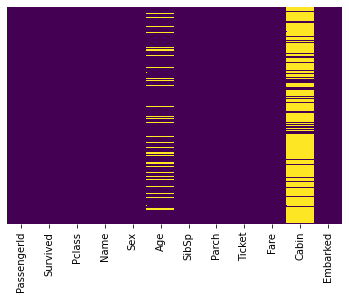

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
sns.set_style('whitegrid')

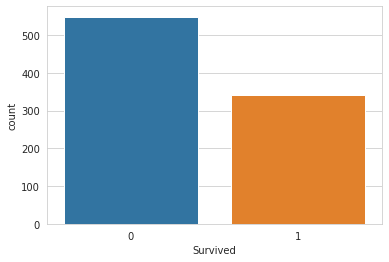

In [10]:
sns.countplot(x='Survived',data=train)

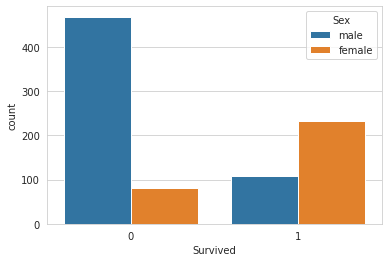

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train)

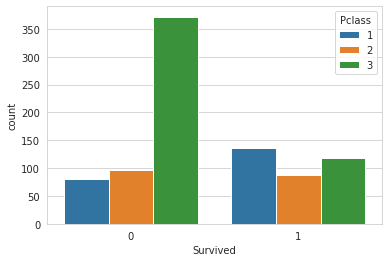

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train)

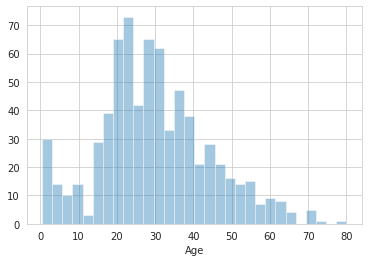

In [13]:

sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [14]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

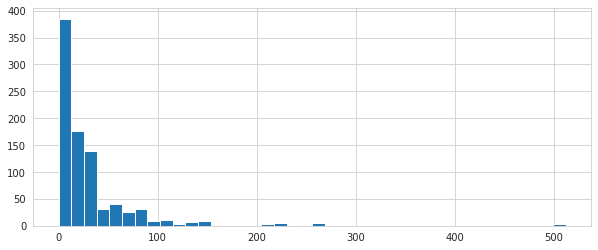

In [15]:
train['Fare'].hist(bins=40,figsize=(10,4))

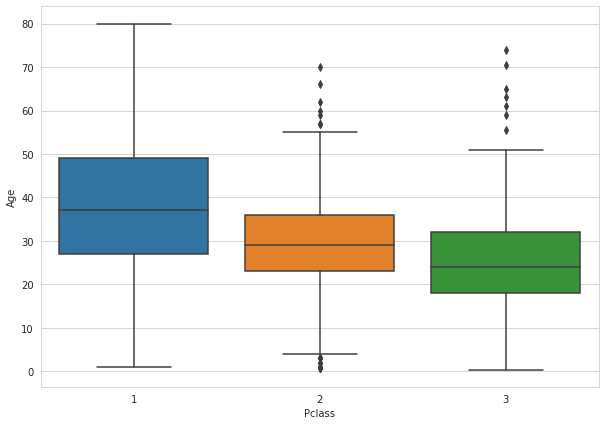

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [0]:
def impute_age(cols):
  Age=cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [0]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

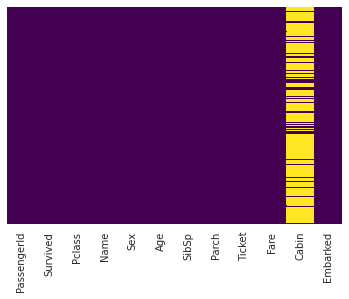

In [19]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [0]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train = pd.concat([train,sex,embark],axis=1)


In [25]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [0]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


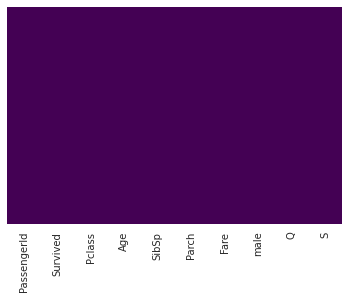

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [0]:
X_TRAIN= train.drop('Survived',axis=1)
Y_TRAIN= train['Survived']

In [33]:
X_TRAIN.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
Y_TRAIN.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
uploaded = files.upload()

Saving test.csv to test.csv


In [36]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 28629 bytes


In [37]:
uploaded

{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [0]:
import io

In [39]:
test= pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


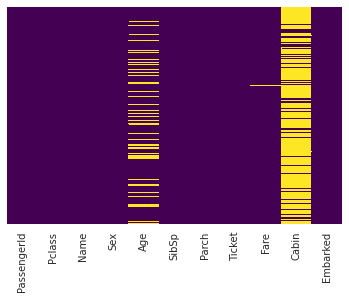

In [40]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

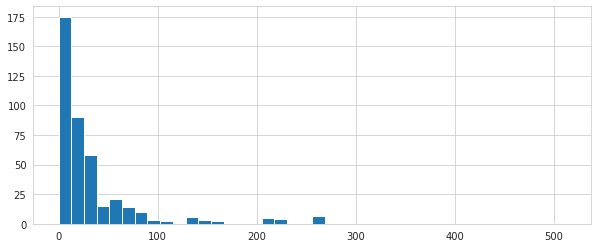

In [41]:
test['Fare'].hist(bins=40,figsize=(10,4))

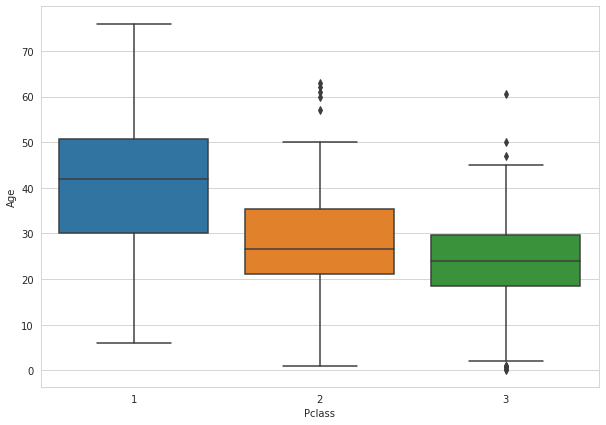

In [43]:

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [0]:
def impute_age(cols):
  Age=cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 42
    elif Pclass==2:
      return 27
    else:
      return 24
  else:
    return Age

In [0]:
test['Age']= test[['Age','Pclass']].apply(impute_age,axis=1)

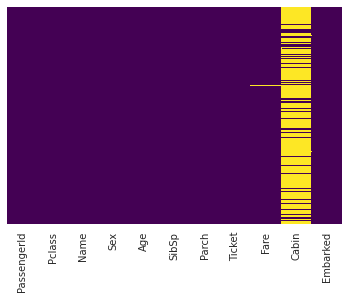

In [46]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
test.drop('Cabin',axis=1,inplace=True)


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


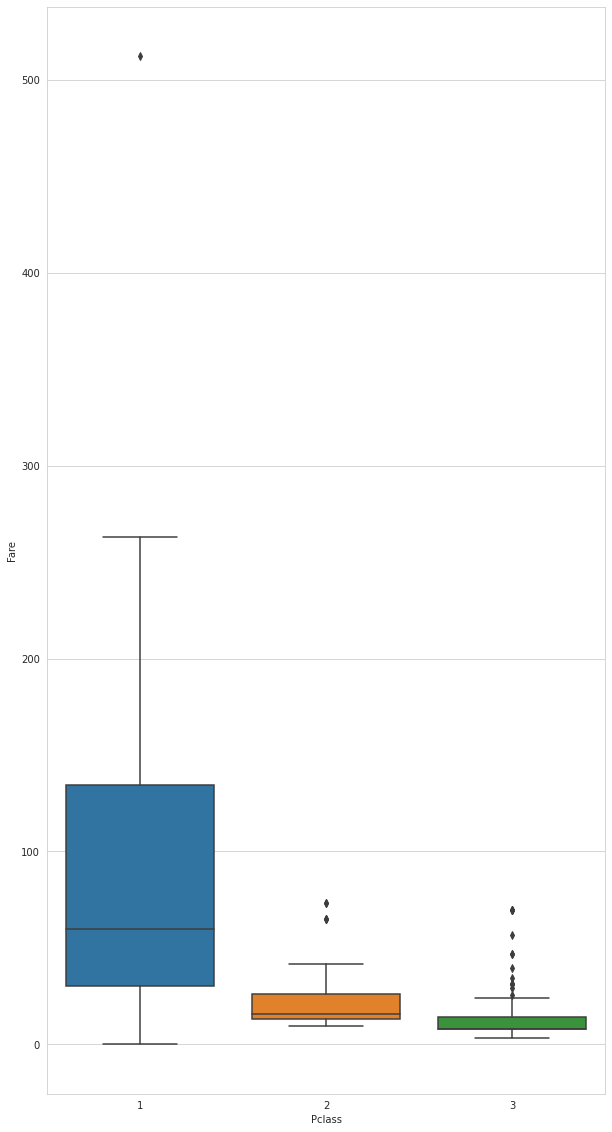

In [49]:
plt.figure(figsize=(10,20))
sns.boxplot(x='Pclass',y='Fare',data=test)

In [0]:
def impute_fare(cols):
  Fare=cols[0]
  Pclass = cols[1]
  if pd.isnull(Fare):
    if Pclass==1:
      return 60
    elif Pclass==2:
      return 20
    else:
      return 10
  else:
    return Fare

In [0]:
test['Fare']= test[['Fare','Pclass']].apply(impute_fare,axis=1)

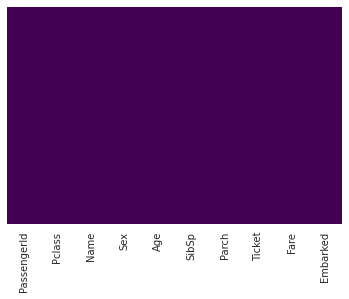

In [52]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,S


In [0]:
sex=pd.get_dummies(test['Sex'],drop_first=True)


In [0]:
embark=pd.get_dummies(test['Embarked'],drop_first=True)

In [0]:
test = pd.concat([test,sex,embark],axis=1)

In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [0]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [59]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [0]:
test.drop(['PassengerId'],axis=1,inplace=True)

In [61]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


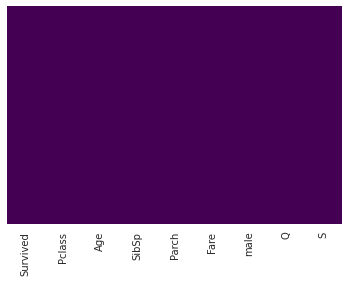

In [62]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
X_TEST=test

In [64]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)

(891, 8)
(418, 8)
(891,)


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:

scaler = MinMaxScaler(feature_range = (0,1))

In [0]:
scaler.fit(X_TRAIN)
X_train = scaler.transform(X_TRAIN)


In [0]:
from sklearn.ensemble import  RandomForestClassifier

In [0]:
rfc= RandomForestClassifier(n_estimators=550)

In [236]:
rfc.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:

scaler.fit(X_TEST)

X_test = scaler.transform(X_TEST)

In [0]:
rfc_pred = rfc.predict(X_TEST)

In [239]:
rfc_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [71]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "gender_submission.csv" with length 3258 bytes


In [72]:

uploaded

{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [0]:
import io

In [74]:
Y_TEST= pd.read_csv(io.StringIO(uploaded['gender_submission.csv'].decode('utf-8')))
Y_TEST.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
Y_TEST.drop(['PassengerId'],axis=1,inplace=True)

In [77]:
Y_TEST.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [0]:
from sklearn import metrics

In [0]:
accuracy=rfc.score(X_TEST,Y_TEST)
accuracytrain=rfc.score(X_TRAIN,Y_TRAIN)

In [242]:

print(accuracy*100)
print(accuracytrain*100)

81.57894736842105
98.20426487093154
